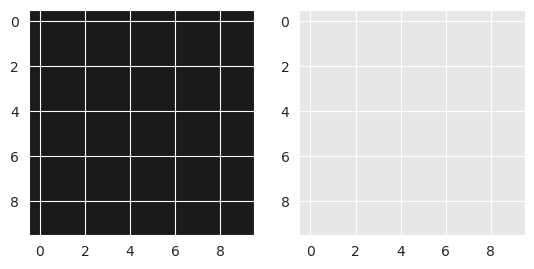

In [27]:
from shared.utils import load_img_array
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import numpy as np 

def get_palette(src: np.ndarray, num_colors: int = 8) -> list[tuple[int, int, int]]:
    """""" 
    img_pixels: np.ndarray = src.reshape(-1, 3)
    km = KMeans(n_clusters=num_colors)
    km.fit(img_pixels)
    centers = km.cluster_centers_
    palette = sorted(centers, key=lambda v: sum(v))
    return palette, km


img = load_img_array("/home/kai/Downloads/616B66F0-AE69-4F24-BED3-EB785535BC8C.PNG")
img = img[:,:,:3]

num_colors = 2
palette, km = get_palette(img, num_colors)

f, axes = plt.subplots(1, num_colors)

for i in range(len(axes)):
    a = np.zeros((10, 10, 3), dtype=np.uint8)
    a[:,:,:] = palette[i]
    axes[i].imshow(a)

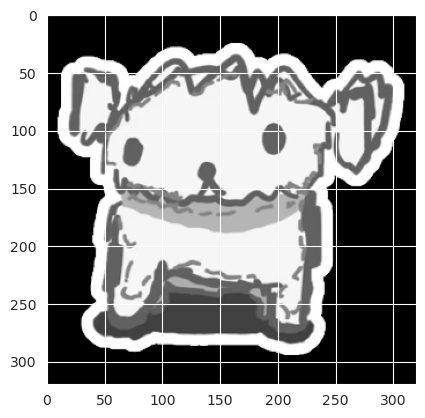

In [28]:
img = img[:,:,:3]
plt.imshow(img)

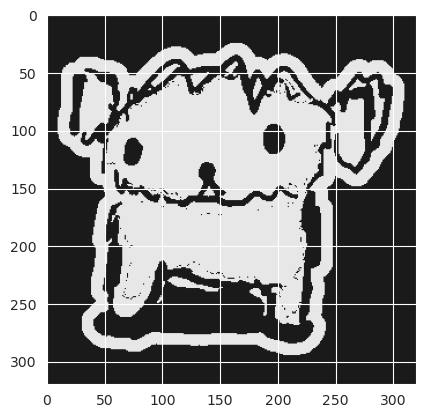

In [29]:
new = np.ones(img.reshape(-1, 3).shape, dtype=np.uint8)

for i in range(new.shape[0]):
    new[i] = km.cluster_centers_[km.labels_[i]]
plt.imshow(new.reshape(img.shape))

In [4]:
from shared.color_schemes import schemes

import json 

with open("colorschemes.json", "w+") as h:
    json.dump(schemes, h)

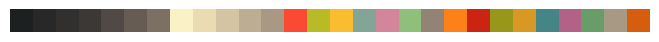

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

def plot_palette(palette: list[tuple[int, int, int]]):
    f, axes = plt.subplots(1, len(palette))
    for i in range(len(axes)):
        axes[i].set_axis_off()
        a = np.zeros((10, 10, 3), dtype=np.uint8)
        a[:,:,:] = palette[i]
        axes[i].imshow(a)
    f.tight_layout(pad=0)

plot_palette(schemes["gruvbox"])